In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ase
from ase import units
from ase import Atom, Atoms, cluster
from ase.visualize import view
from ase.io.trajectory import Trajectory
from ase.lattice.cubic import FaceCenteredCubic
from NCMD.analyze import get_radial_distance, get_components, get_integrated_rd, get_cluster_sizes

## Import test data from datasets folder

In [6]:
T_293 = ase.io.read('datasets/Au_667_293_last.xyz')
T_333 = ase.io.read('datasets/Au_667_333_last.xyz')
T_473 = ase.io.read('datasets/Au_667_473_last.xyz')
T_1000 = ase.io.read('datasets/Au_667_1000_last.xyz')

## Get Radial Distances

In [14]:
size = 3
surfaces = [(1, 0, 0), (1, 1, 0), (1, 1, 1)]
layers = [6, 9, 5]
Au_lattice = FaceCenteredCubic(directions=[[1, 0, 0], [0, 1, 0], [0, 0, 1]],
                          symbol='Au',
                          size=(size, size, size),
                          pbc=True)
ico = ase.cluster.Icosahedron(symbol = 'Au', noshells = 4)
dec = ase.cluster.Decahedron(symbol = 'Au', p = 5, q = 1, r = 0)

In [15]:
Austr = f"Au{len(Au_lattice.positions)}"
Au_bulk = Atoms(Austr, positions = Au_lattice.positions)

In [16]:
bins = np.arange(0,1000, 0.1)
c293, b293 = get_radial_distance(atoms = T_293, bins=bins)
c333, b333 = get_radial_distance(atoms = T_333, bins=bins)
c473, b473 = get_radial_distance(atoms = T_473, bins=bins)

cBulk, bBulk = get_radial_distance(atoms = Au_bulk, bins=bins)
cico, bico = get_radial_distance(atoms = ico, bins=bins)
cdec, bdec = get_radial_distance(atoms = dec, bins=bins)

In [17]:
sigma = 0.2651 * units.nm
r_cutoff = 3*sigma
bins_r0 = bdec / sigma

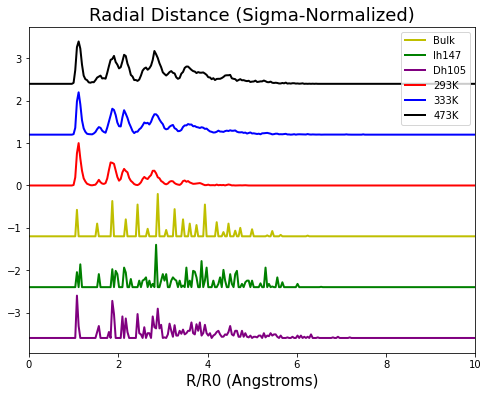

In [24]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(bins_r0, (cBulk/np.max(cBulk))- 1.2, c = 'y', lw = 2, label = 'Bulk')
ax.plot(bins_r0, (cico/np.max(cico))- 2.4, c = 'g', lw = 2, label = f"Ih{len(ico.positions)}")
ax.plot(bins_r0, (cdec/np.max(cdec)) - 3.6, c = 'purple', lw = 2, label = f"Dh{len(dec.positions)}")
ax.plot(bins_r0, c293/np.max(c293), c = 'r', lw = 2, label = '293K')
ax.plot(bins_r0, c333/np.max(c333) + 1.2, c = 'b', lw = 2, label = '333K')
ax.plot(bins_r0, c473/np.max(c473) + 2.4, c = 'k', lw = 2, label = '473K')
ax.set_xlim(0,10)
ax.set_xlabel('R/R0 (Angstroms)', size = 15)
ax.set_title('Radial Distance (Sigma-Normalized)', size = 18)
ax.legend()
plt.show()

## Isolate and Visualize individual components (clusters)

In [7]:
comp_T293 = get_components(T_293, kcutoff=5)
comp_T333 = get_components(T_333, kcutoff=5)
comp_T473 = get_components(T_473, kcutoff=5)
comp_T1000 = get_components(T_1000, kcutoff=5)

counts: [('0D', 86)]
counts: [('0D', 55)]
counts: [('0D', 96)]
counts: [('0D', 677)]


In [ ]:
## Uncomment below if you'd like to individually view the components. Only perform on comp datasets of a resonable size < 50

# counter = 1
# for dim, components in comp_hd333.items():
#     for atoms in components:
#         print(len(atoms.positions))

#         if counter ==1:    
#             #view(atoms, block=True)  

## Calculate and plot Cluster Sizes at different temperatures using Violin Plot

In [9]:
csize_T293 = get_cluster_sizes(comp_T293)
csize_T333 = get_cluster_sizes(comp_T333)
csize_T473 = get_cluster_sizes(comp_T473)
csize_T1000 = get_cluster_sizes(comp_T1000)

In [10]:
csizes_hd = [csize_T293.flatten(), csize_T333.flatten(), csize_T473.flatten(), csize_T1000.flatten()]
temps_hd = ['293K', '333K', '473K', 'T=1000K']
means_hd =  [np.mean(csize_T293), np.mean(csize_T333), np.mean(csize_T473), np.mean(csize_T1000)]

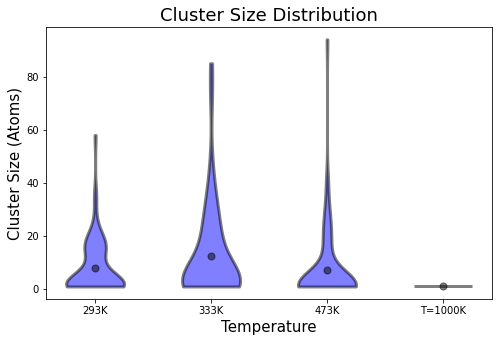

In [11]:
fig, ax = plt.subplots(figsize = (8,5))
parts = ax.violinplot(csizes_hd, showmeans=False, showmedians=False, showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('b')
    pc.set_alpha(0.5)
    pc.set_edgecolor('k')
    pc.set_linewidth(3)
ax.scatter(np.arange(1, len(temps_hd) + 1), means_hd, marker='o', color='k', s=50, zorder=3, alpha = 0.5)
ax.set_xlabel('Temperature', size = 15)
ax.set_ylabel('Cluster Size (Atoms)', size = 15)
ax.set_xticks(np.arange(1, len(temps_hd) + 1))
ax.set_xticklabels(temps_hd, size = 10)
#ax.set_ylim((-5,400))
ax.set_title('Cluster Size Distribution', size = 18)
#ax.plot(np.arange(1, len(temps) + 1), means, c = 'k')
plt.show()